In [15]:
from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

Text(0.5, 1.0, 'feature scatter')

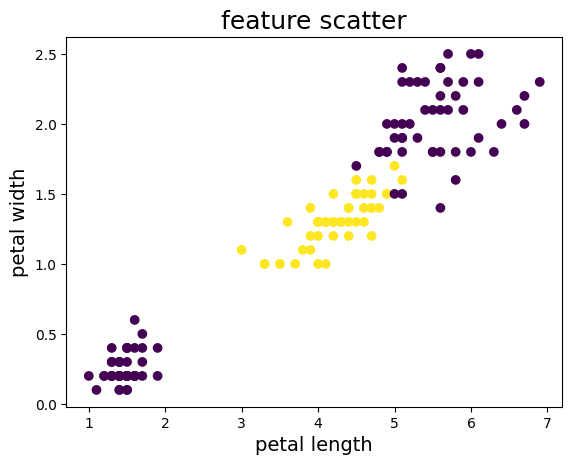

In [16]:
X = iris["data"][:, (2, 3)]
y = (iris['target'] == 1).astype(np.float64)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("petal length", fontsize = 14)
plt.ylabel("petal width", fontsize = 14)
plt.title("feature scatter", fontsize = 18)

In [17]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss = 'hinge', max_iter = 50000))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=50000))])

In [18]:
def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^') 
  plt.axis(axes)
  plt.grid(True, which = 'both')
  plt.xlabel(r"$x_1$", fontsize = 14)
  plt.ylabel(r"$x_2$", fontsize = 14)

In [19]:
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)

  #colormap 그리기기
  pdct = plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha=0.2)
  dcct = plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha=0.2)
  plt.colorbar(pdct)

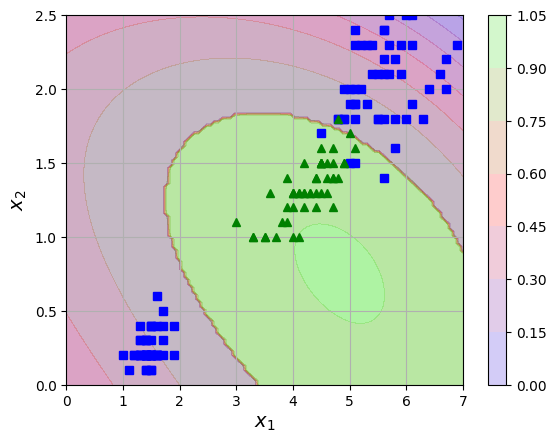

In [20]:
plot_predictions(polynomial_svm_clf, [0, 7, 0, 2.5])
plot_dataset(X, y, [0, 7, 0, 2.5])
plt.show()

# 커널 사용하기(poly, rbf)

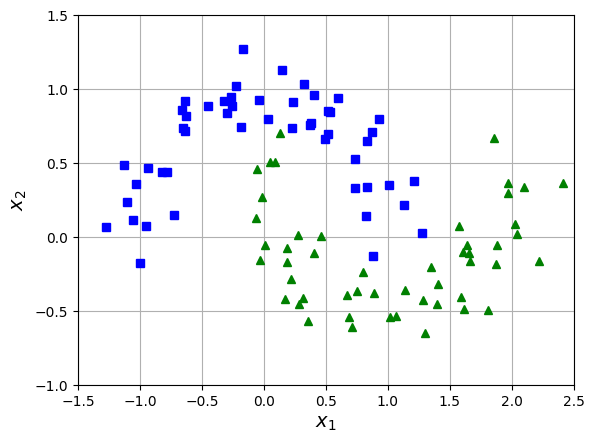

In [21]:
X, y = make_moons(n_samples = 100, noise = 0.15 , random_state = 42)

# plot_dataset 이미 앞에서 정의
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [22]:
# r값이 1일 때 (coef = r)
ploy_kernal_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0=1, C = 5))
])

ploy_kernal_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

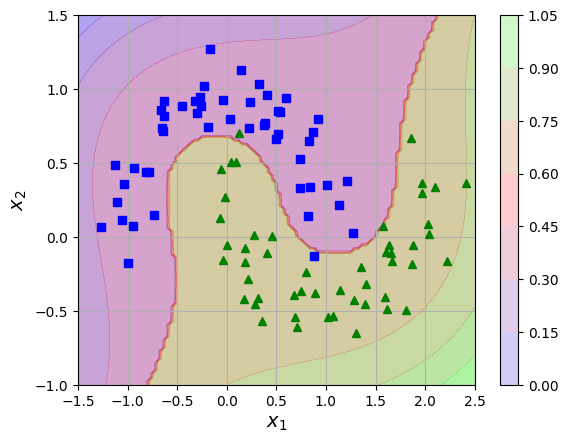

In [23]:
plot_predictions(ploy_kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [24]:
# r값이 100일 때 (coef = r)
ploy100_kernal_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 10, coef0=1, C = 5))
])

ploy100_kernal_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

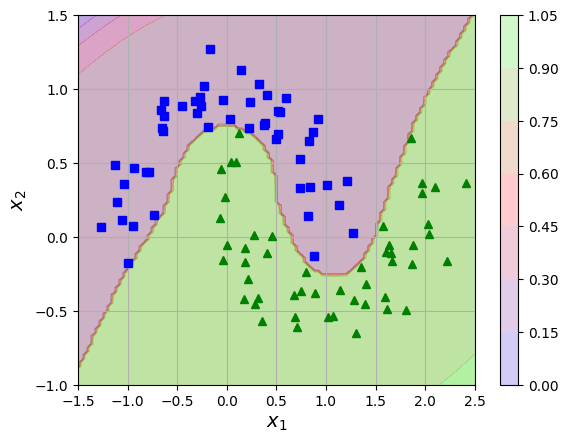

In [25]:
plot_predictions(ploy100_kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

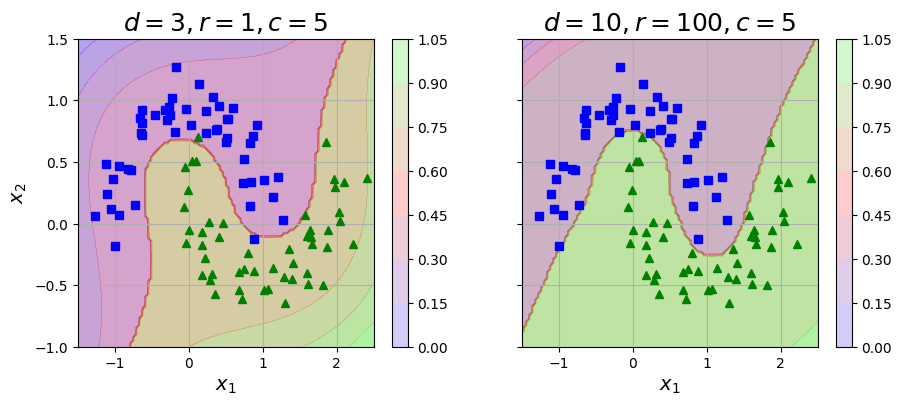

In [26]:
#subplot 만들기, 그래프를 합쳐 같이 그리기기
fig, axes = plt.subplots(ncols = 2, figsize = (10.5, 4), sharey = True)

plt.sca(axes[0])
plot_predictions(ploy_kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, c=5$", fontsize = 18)

plt.sca(axes[1])
plot_predictions(ploy100_kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, c=5$", fontsize = 18)
plt.ylabel("")

plt.show()

In [27]:
# rbf 커널
rbf_kernal_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
])

rbf_kernal_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

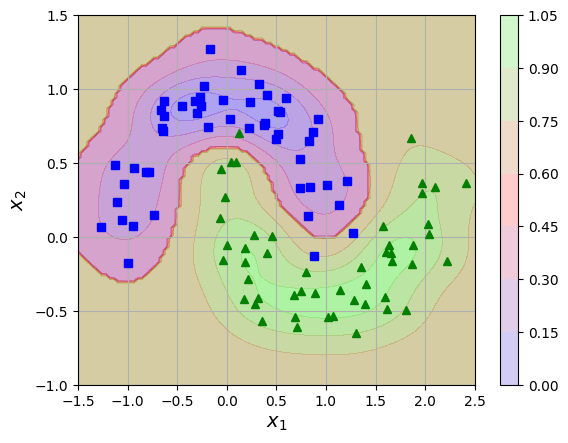

In [28]:
plot_predictions(rbf_kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Homework #4

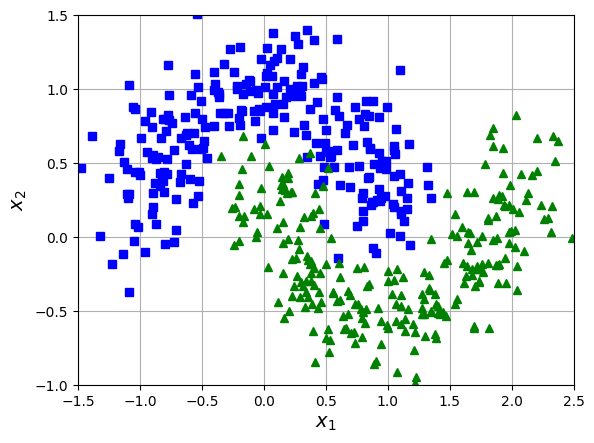

In [29]:
#data load
moon_X, moon_y = make_moons(n_samples = 500, noise = 0.2 , random_state = 42)

# plot_dataset 이미 앞에서 정의
plot_dataset(moon_X, moon_y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [30]:
# rbf 커널 생성, Gamma 값 바꾸기

# verson1, Gamma: 0.1, C:0.001
rbf_kernal_svm_clf_ver1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 0.1, C = 0.001))
])

rbf_kernal_svm_clf_ver1.fit(X, y)

# version2, Gamma: 1, C:0.001
rbf_kernal_svm_clf_ver2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 1, C = 0.001))
])

rbf_kernal_svm_clf_ver2.fit(X, y)

# version3, Gamma: 5, C:0.001
rbf_kernal_svm_clf_ver3 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
])

rbf_kernal_svm_clf_ver3.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [31]:
# rbf 커널 생성, C값 바꾸기

# version4, Gamma: 0.1, C: 1000
rbf_kernal_svm_clf_ver4 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 0.1, C = 1000))
])

rbf_kernal_svm_clf_ver4.fit(X, y)

# version5, Gamma: 1, C: 1000
rbf_kernal_svm_clf_ver5 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 1, C = 1000))
])

rbf_kernal_svm_clf_ver5.fit(X, y)

# version6, Gamma: 5, C: 1000
rbf_kernal_svm_clf_ver6 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 1000))
])

rbf_kernal_svm_clf_ver6.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=5))])

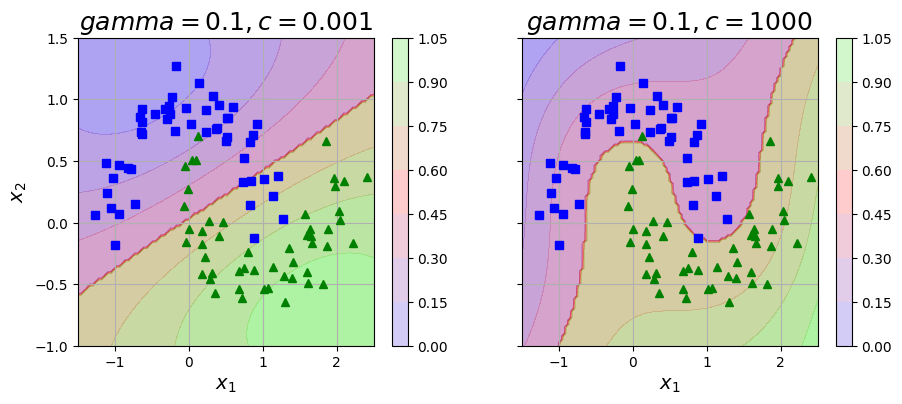

In [32]:
# gamma와 c 비교를 위한 subplot 생성
fig, axes = plt.subplots(ncols = 2, figsize = (10.5, 4), sharey = True)

# version1, Gamma: 0.1, C:0.001
plt.sca(axes[0])
plot_predictions(rbf_kernal_svm_clf_ver1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=0.1, c=0.001$", fontsize = 18)

# version4, Gamma: 0.1, C: 1000
plt.sca(axes[1])
plot_predictions(rbf_kernal_svm_clf_ver4, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=0.1, c=1000$", fontsize = 18)
plt.ylabel("")

plt.show()

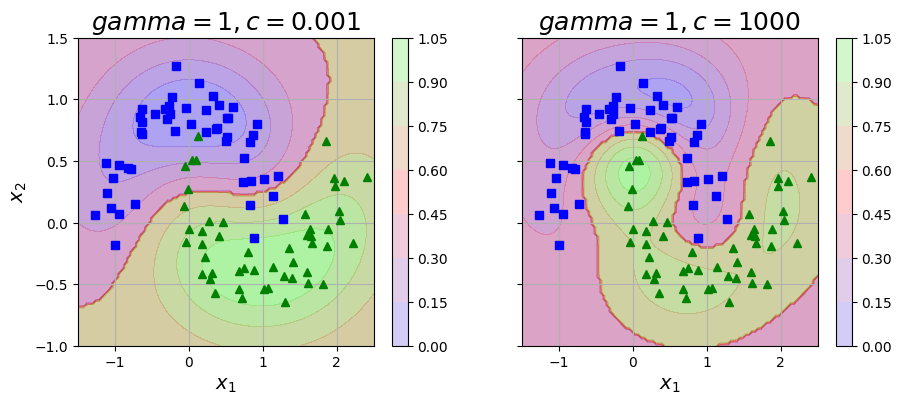

In [33]:
# gamma와 c 비교를 위한 subplot 생성
fig, axes = plt.subplots(ncols = 2, figsize = (10.5, 4), sharey = True)

# version2, Gamma: 1, C:0.001
plt.sca(axes[0])
plot_predictions(rbf_kernal_svm_clf_ver2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=1, c=0.001$", fontsize = 18)

# version5, Gamma: 1, C: 1000
plt.sca(axes[1])
plot_predictions(rbf_kernal_svm_clf_ver5, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=1, c=1000$", fontsize = 18)
plt.ylabel("")

plt.show()

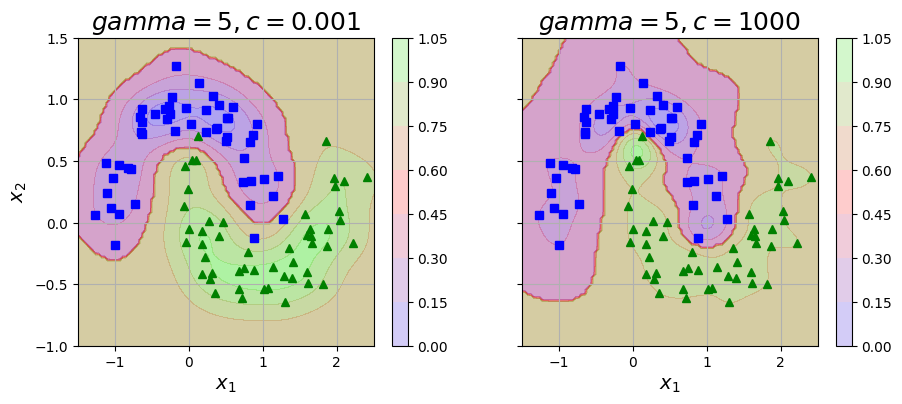

In [34]:
# gamma와 c 비교를 위한 subplot 생성
fig, axes = plt.subplots(ncols = 2, figsize = (10.5, 4), sharey = True)

# version3, Gamma: 0.1, C:0.001
plt.sca(axes[0])
plot_predictions(rbf_kernal_svm_clf_ver3, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=5, c=0.001$", fontsize = 18)

# version6, Gamma: 0.1, C: 1000
plt.sca(axes[1])
plot_predictions(rbf_kernal_svm_clf_ver6, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=5, c=1000$", fontsize = 18)
plt.ylabel("")

plt.show()

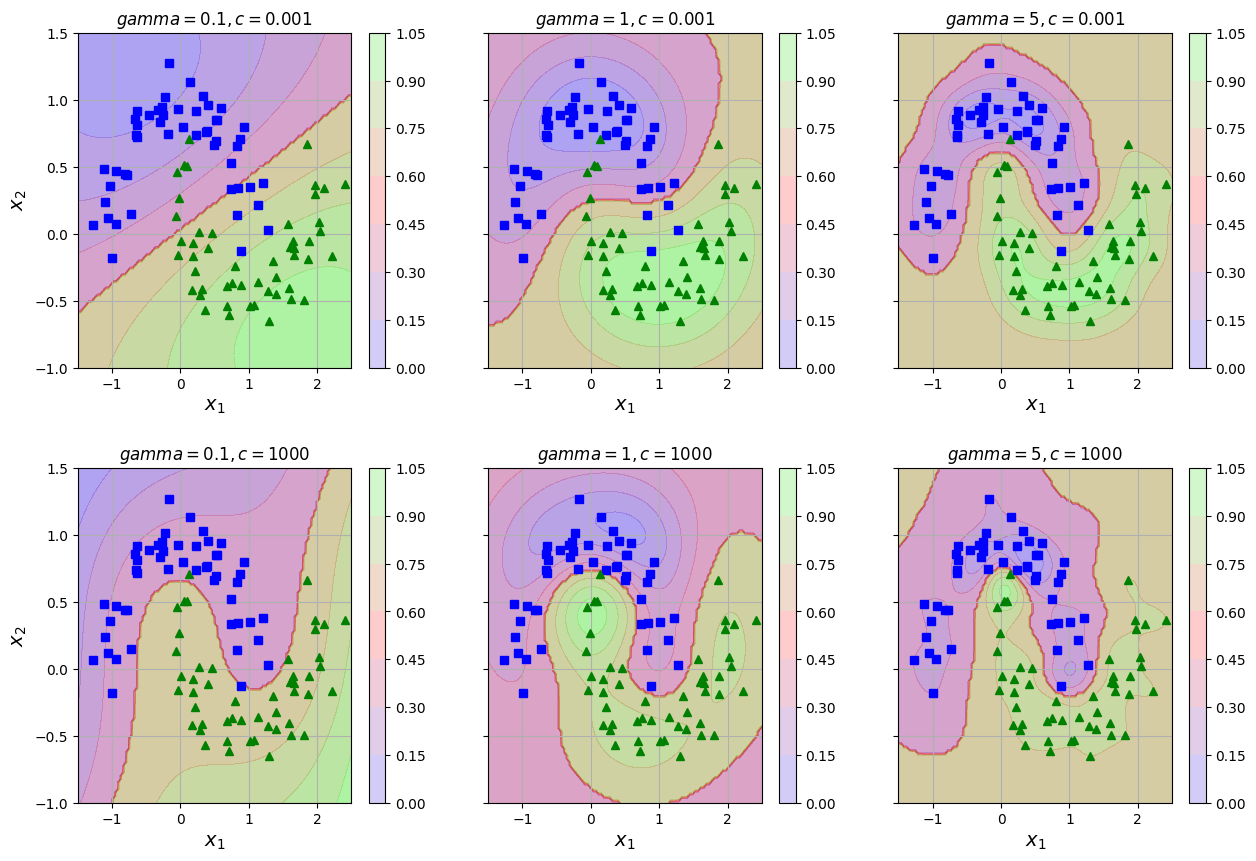

In [46]:
# gamma와 c 비교를 위한 subplot 생성
fig, axes = plt.subplots(nrows = 2, ncols = 3, 
                         figsize = (15, 10), sharey = True)

# verson1, Gamma: 0.1, C:0.001
plt.sca(axes[0, 0])
plot_predictions(rbf_kernal_svm_clf_ver1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=0.1, c=0.001$", fontsize = 12)

# version2, Gamma: 1, C:0.001
plt.sca(axes[0, 1])
plot_predictions(rbf_kernal_svm_clf_ver2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=1, c=0.001$", fontsize = 12)
plt.ylabel("")

# version3, Gamma: 0.1, C:0.001
plt.sca(axes[0, 2])
plot_predictions(rbf_kernal_svm_clf_ver3, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=5, c=0.001$", fontsize = 12)
plt.ylabel("")

# version4, Gamma: 0.1, C: 1000
plt.sca(axes[1, 0])
plot_predictions(rbf_kernal_svm_clf_ver4, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=0.1, c=1000$", fontsize = 12)

# version5, Gamma: 1, C: 1000
plt.sca(axes[1, 1])
plot_predictions(rbf_kernal_svm_clf_ver5, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=1, c=1000$", fontsize = 12)
plt.ylabel("")

# version6, Gamma: 0.1, C: 1000
plt.sca(axes[1, 2])
plot_predictions(rbf_kernal_svm_clf_ver6, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$gamma=5, c=1000$", fontsize = 12)
plt.ylabel("")

plt.subplots_adjust(hspace = 0.3, wspace=0.2)
plt.show()